In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('ex_prova_1_tf.csv')
df = df.set_index('Time')

t_step = 1e-6
t_final = .05

df

,I(L1),Vout
Time,,
0.000001,-0.095996,0.003265
0.000002,-0.191978,0.010868
0.000003,-0.287946,0.021713
0.000004,-0.383887,0.036871
0.000005,-0.479794,0.056324
...,...,...
0.049996,-3.507640,29.489900
0.049997,-3.411640,29.378400
0.049998,-3.315640,29.267400


In [6]:
iL = df['I(L1)']
Vout = df['Vout']

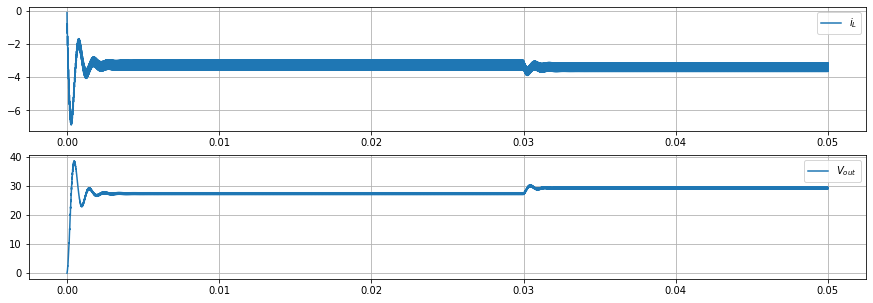

In [9]:
import matplotlib.pyplot as plt
# import mpld3
# mpld3.enable_notebook()

plt.figure(figsize=(15, 5))
plt.subplot(211)
plt.plot(iL, label='$i_L$')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(Vout, label='$V_{out}$')
plt.legend()
plt.grid()
plt.show()

In [10]:
import numpy as np
import numpy.linalg as lin

In [11]:
L = 500e-6
Cap = 22e-6
R = 12
Vin = 48
D = 0.7

In [12]:
K = np.array([[L,   0], 
              [0, Cap]])

1ª Etapa do conversor

In [34]:
A1 = np.array([[0  ,1],
               [-1, -1/R]])
B1 = np.array([-1, 0])
C1 = np.array([[1, 0], [0, 1]])
E1 = np.array([0, 0])

2ª Etapa do conversor

In [35]:
A2 = np.array([[0,    0],
               [0, -1/R]])
B2 = np.array([1, 0])
C2 = np.array([[1, 0], [0, 1]])
E2 = np.array([0, 0])

Matrizes médias

In [36]:
A = D*A1 + (1-D)*A2;
B = D*B1 + (1-D)*B2;
C = D*C1 + (1-D)*C2;
E = D*E1 + (1-D)*E2;

Valores em regime permanente

In [37]:
U = Vin
X = np.dot(np.dot(-lin.inv(A), B), U)
Y = np.dot((np.dot(np.dot(-C, lin.inv(A)), B)+E), U)

Matrizes padrão para representação do modelo CA em espaço de estados

In [38]:
Ap = np.dot(lin.inv(K),A)
print(Ap)

[[     0.           1400.        ]
 [-31818.18181818  -3787.87878788]]


In [39]:
Bp = np.array([np.dot(lin.inv(K), B), 
               np.dot(lin.inv(K), (np.dot((A1-A2),X) + np.dot((B1-B2), U)))]).transpose()
print(Bp)

[[   -800.         -137142.85714286]
 [      0.          148423.00556586]]


In [40]:
Cp = C
print(Cp)

[[1. 0.]
 [0. 1.]]


In [41]:
Ep = np.array([E, np.dot((C1-C2),X) + np.dot((E1-E2),U)]).transpose()
print(Ep)

[[0. 0.]
 [0. 0.]]


In [42]:
import control as ctrl
import scipy.signal as sig

In [43]:
# Aq, Bq, Cq, Eq = -4., 2., 1., 0.

In [44]:
import scipy
ss_buckboost = sig.StateSpace(Ap, Bp, Cp, Ep)
# ss_buckboost = sig.StateSpace(Aq, Bq, Cq, Eq); ss_buckboost
print(Ap.shape, Bp.shape, Cp.shape, Ep.shape)

(2, 2) (2, 2) (2, 2) (2, 2)


In [45]:
def step(t, t_step, y_inital, y_final, verbatim=False):
    ret = np.ones(t.size)
    
    yt_initial = t < t_step
    ret[yt_initial] = y_inital
    
    yt_final = t >= t_step
    ret[yt_final] = y_final
    
    import matplotlib.pyplot as plt
    
    if verbatim:
        plt.plot(t, ret)
        plt.show()

    return ret

In [46]:
t_in = np.arange(0, t_final, t_step)

u = step(t_in, .03, 0, 0)
d = step(t_in, .03, 0, .02)

up = np.array([u, d]).transpose()

In [47]:
# t, y1, y2 = sig.dlsim(ss_buckboost, up)

# iL_ss   = y1[:,0] + Y[0]
# Vout_ss = y1[:,1] + Y[1]

# if np.sum(y1 == y2) != 0:
#     print('y1 is diffrent to y2: %d de %d' % (np.sum(y1 == y2), y1.size))
    
# import matplotlib.pyplot as plt

# plt.figure(figsize=(15, 5))
# plt.subplot(211)
# plt.plot(t, iL_ss, 'o', label='$i_{L, ss}$')
# plt.legend()
# plt.grid()
# plt.subplot(212)
# plt.plot(t, Vout_ss, label='$V_{out, ss}$')
# plt.legend()
# # plt.tight_layout()
# plt.grid()

y1 is diffrent to y2: 100002 de 100002


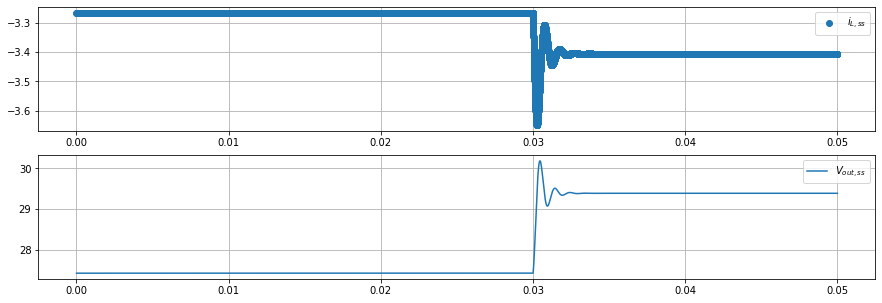

In [48]:
t_in = np.arange(0, t_final, t_step)

u = step(t_in, .03, 0, 0)
d = step(t_in, .03, 0, .02)

up = np.array([u, d]).transpose()

t, y1, y2 = sig.lsim(ss_buckboost, up, T=t_in)

iL_ss   = y1[:,0] + Y[0]
Vout_ss = y1[:,1] + Y[1]

if np.sum(y1 == y2) != 0:
    print('y1 is diffrent to y2: %d de %d' % (np.sum(y1 == y2), y1.size))
    
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.subplot(211)
plt.plot(t, iL_ss, 'o', label='$i_{L, ss}$')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(t, Vout_ss, label='$V_{out, ss}$')
plt.legend()
# plt.tight_layout()
plt.grid()

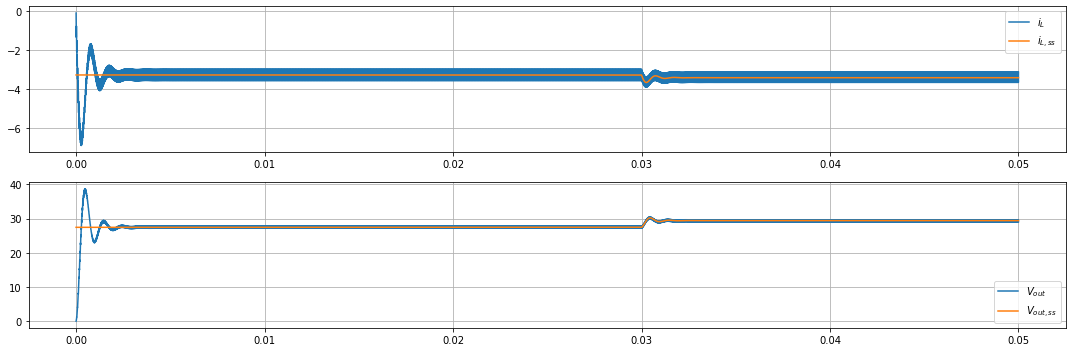

In [49]:
plt.figure(figsize=(15, 5))
plt.subplot(211)
plt.plot(df.index, iL, label='$i_L$')
plt.plot(t, iL_ss, label='$i_{L, ss}$')
# plt.ylim(-5, 25)
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(df.index, Vout, label='$V_{out}$')
plt.plot(t, Vout_ss, label='$V_{out, ss}$')
# plt.ylim(-45, -5)
plt.legend()
plt.tight_layout()
plt.grid()

In [50]:
iL_ss[10]

-3.2653061224489788

In [51]:
ss_buckboost.to_tf()

c:\users\tiarl\appdata\local\programs\python\python37-32\lib\site-packages\scipy\signal\filter_design.py:1619: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


TransferFunctionContinuous(
array([[-8.00000000e+02, -3.03030303e+06],
       [-4.54747351e-13,  2.54545455e+07]]),
array([1.00000000e+00, 3.78787879e+03, 4.45454545e+07]),
dt: None
)

In [52]:
from scipy.signal import ss2tf
from control import tf

In [53]:
(num, den) = ss2tf(Ap,Bp,Cp,Ep,0)

n_of_decimals = 6
num = np.around(num, n_of_decimals)
den = np.around(den, n_of_decimals)

Gi_vg = tf(num[0], den)
Gv_vg = tf(num[1], den)

In [54]:
print(Gi_vg)


    -800 s - 3.03e+06
------------------------
s^2 + 3788 s + 4.455e+07



In [55]:
print(Gv_vg)


        2.545e+07
------------------------
s^2 + 3788 s + 4.455e+07



In [56]:
(num, den) = ss2tf(Ap,Bp,Cp,Ep,1)

num = np.around(num, n_of_decimals)
den = np.around(den, n_of_decimals)

Gi_vg = tf(num[0], den)
Gv_vg = tf(num[1], den)

In [57]:
print(Gi_vg)


-1.371e+05 s - 3.117e+08
------------------------
s^2 + 3788 s + 4.455e+07



In [58]:
print(Gv_vg)


1.484e+05 s + 4.364e+09
------------------------
s^2 + 3788 s + 4.455e+07

